## AMAZON E-COMMERCE BEST SELLING BOOKS DATA ANALYSIS BY OLUWATOMISIN AROKODARE -PART 2

## PROJECT OVERVIEW

>**Amazon marketplace has been a leading e-commerce platform for book sales since July 5th,1994.It was established by Jeff Bezos and will continue to be a leader in technological innovation, customer service, and a diverse marketplace. Amazon has revolutionized book sales and distribution by growing into one of the largest and most diverse online marketplaces in the world.**

>**The impact of Amazon on the book industry and e-commerce landscape continues to grow,despite selling items other than books, such as electronics, clothing, and home goods, amazon continues to invest in enhancing its book-selling capabilities and values books as its core business.**

**OBSERVATION:
After accessing the web scrapping dataset from the amazon website, several rows in the scraped dataset for 2009-2019 have missing and null values. 
My assessment of the CSV file where the scrapped data was saved helped me find the missing values using the information provided on the website and I manually added them to the file using excel to preserve the quality of the scrapped data and avoid removing data that may affect our analysis. I realized that some of the books on the website had multiple formats with different values for (cover types). Some columns were also missing (Reviews, author, and prices).**


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

# Word cloud creation
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from PIL import Image

# to bypass warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the adjusted data scrapped from amazon website 
df1 = pd.read_csv('Amazon_best_selling_books_dataset.csv', encoding='latin-1')
df1

,Unnamed: 0,title,author,cover_type,ratings,ranks,price,no_of_reviews,year
0,0,The Lost Symbol (Robert Langdon),Dan Brown,Hardcover,4.3,1,5.99,"28,989",2009
1,1,The Shack: Where Tragedy Confronts Eternity,William P. Young,Paperback,4.6,2,6.99,"41,124",2009
2,2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,Hardcover,4.8,3,20.31,"5,340",2009
3,3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,Hardcover,4.7,4,20.49,"25,408",2009
4,4,Going Rogue: An American Life,Sarah Palin,Hardcover,4.6,5,6.30,"1,599",2009
...,...,...,...,...,...,...,...,...,...
654,655,The Road Back to You: An Enneagram Journey to ...,Ian Morgan Cron,Hardcover,4.7,76,9.99,"12,563",2019
655,656,The Tattooist of Auschwitz: A Novel,Heather Morris,Paperback,4.6,77,9.39,"158,421",2019
656,657,People of Walmart Adult Coloring Book: Rolling...,Andrew Kipple,Paperback,4.7,78,12.96,"11,494",2019
657,658,The Great Gatsby: The Only Authorized Edition,F. Scott Fitzgerald,Paperback,4.4,79,7.10,"15,450",2019


## OBSERVATION-AMAZON BEST SELLING BOOKS CATEGORISATION:

**In data curation process which is the process of organization and integration of data collected from various sources.It was observed that Amazon best book selling  does not have a definite categorization of books on their website as one book can be found in different departments. This departments include Biographies & Memoirs,Christian Books & Bibles, Arts & Photography, Business & Money, Children's Books,parenting and relationship, medical books, Comics & Graphic Novels etc).***

**There is a need for categorizing the books in different departments into a distinct category for exploratory analysis. I checked the Goodreads website https://www.goodreads.com/ which is the world's largest site for readers and book recommendations to get the distinct category of each books.**

**I then checked kaggle for a dataset that has the title and distinct category (Non fiction and Fiction) of the books scrapped from amazon website for 2009-2019.This dataset will be merged with the amazon best selling books dataset scrapped from the website.**

In [3]:
 ## Importing the data from kaggle that has the genre of amazon best selling books 
df2=pd.read_csv('Amazon_best_selling_books_data.csv')
df2                           

,title,genre
0,The Lost Symbol,Fiction
1,The Shack: Where Tragedy Confronts Eternity,Fiction
2,Liberty and Tyranny: A Conservative Manifesto,Non Fiction
3,"Breaking Dawn (The Twilight Saga, Book 4)",Fiction
4,Going Rogue: An American Life,Non Fiction
...,...,...
1081,There's No Place Like Space: All About Our Sol...,Non Fiction
1082,How to Draw 101 Animals (1),Non Fiction
1083,Simply Keto: A Practical Approach to Health & ...,Non Fiction
1084,The Outsiders,Fiction


In [4]:
###To merge the genre category dataset with the data scrapped
amazon_best_book_df= df2.merge(df1, on= "title")
amazon_best_book_df

,title,genre,Unnamed: 0,author,cover_type,ratings,ranks,price,no_of_reviews,year
0,The Shack: Where Tragedy Confronts Eternity,Fiction,1,William P. Young,Paperback,4.6,2,6.99,"41,124",2009
1,The Shack: Where Tragedy Confronts Eternity,Fiction,506,William P. Young,Paperback,4.6,27,6.99,"41,124",2017
2,The Shack: Where Tragedy Confronts Eternity,Fiction,1,William P. Young,Paperback,4.6,2,6.99,"41,124",2009
3,The Shack: Where Tragedy Confronts Eternity,Fiction,506,William P. Young,Paperback,4.6,27,6.99,"41,124",2017
4,The Shack: Where Tragedy Confronts Eternity,Fiction,1,William P. Young,Paperback,4.6,2,6.99,"41,124",2009
...,...,...,...,...,...,...,...,...,...,...
1832,Me: Elton John Official Autobiography,Non Fiction,654,Elton John,Hardcover,4.7,75,9.90,"27,342",2019
1833,The Road Back to You: An Enneagram Journey to ...,Non Fiction,655,Ian Morgan Cron,Hardcover,4.7,76,9.99,"12,563",2019
1834,The Tattooist of Auschwitz: A Novel,Fiction,656,Heather Morris,Paperback,4.6,77,9.39,"158,421",2019
1835,People of Walmart Adult Coloring Book: Rolling...,Non Fiction,657,Andrew Kipple,Paperback,4.7,78,12.96,"11,494",2019


In [5]:
###Saving the new amazon best selling books with genre category dataset as csv
amazon_best_book_df.to_csv('AmazonBestSellingBooks_Data_2009_2019.csv')

### ASSESSING THE DATA

In [6]:
amazon_best_book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1836
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1835 non-null   object 
 1   genre          1837 non-null   object 
 2   Unnamed: 0     1837 non-null   int64  
 3   author         1831 non-null   object 
 4   cover_type     1836 non-null   object 
 5   ratings        1837 non-null   float64
 6   ranks          1837 non-null   int64  
 7   price          1837 non-null   float64
 8   no_of_reviews  1837 non-null   object 
 9   year           1837 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 157.9+ KB


In [7]:
amazon_best_book_df.describe()

,Unnamed: 0,ratings,ranks,price,year
count,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000
mean,343.523680,4.591998,39.101796,13.571067,2014.250953
std,184.005592,0.208731,26.047802,12.497607,3.010811
min,1.000000,3.600000,1.000000,0.000000,2009.000000
25%,195.000000,4.500000,15.000000,7.930000,2012.000000
50%,349.000000,4.600000,30.000000,11.580000,2014.000000
75%,502.000000,4.700000,64.000000,15.970000,2017.000000
max,659.000000,4.900000,80.000000,142.090000,2019.000000


In [8]:
amazon_best_book_df.shape

(1837, 10)

In [9]:
amazon_best_book_df['genre'].unique()

array(['Fiction', 'Non Fiction'], dtype=object)

In [10]:
amazon_best_book_df['cover_type'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Board book',
       nan], dtype=object)

In [11]:
amazon_best_book_df['year'].unique()

array([2009, 2017, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018, 2019],
      dtype=int64)

In [12]:
amazon_best_book_df.isna().sum()

title            2
genre            0
Unnamed: 0       0
author           6
cover_type       1
ratings          0
ranks            0
price            0
no_of_reviews    0
year             0
dtype: int64

In [13]:
amazon_best_book_df.duplicated().sum()

1227

### DATA CLEANING 

In [14]:
### Creating a copy of the dataset for datacleaning 
best_selling_books = amazon_best_book_df.copy()

In [15]:
##Dropping the duplicate values in the dataset 
best_selling_books.drop_duplicates(inplace=True)
best_selling_books.duplicated().sum()

0

In [16]:
##Dropping irrelevant column in the dataset
del best_selling_books['Unnamed: 0']

#### Removing the null values in the dataset
**After carefully filling in the null values with the information on the amazon websiste.The dataset column title,author and cover types still has some null values.This is as a result of the book title,author or cover_types not available on the amazon website.**

In [17]:
best_selling_books.isna().sum()

title            2
genre            0
author           3
cover_type       1
ratings          0
ranks            0
price            0
no_of_reviews    0
year             0
dtype: int64

In [18]:
###Droping the null values in the dataset 
best_selling_books = best_selling_books .dropna(subset=[ 'title', 'cover_type', 'author'])
best_selling_books.isna().sum()

title            0
genre            0
author           0
cover_type       0
ratings          0
ranks            0
price            0
no_of_reviews    0
year             0
dtype: int64

In [19]:
best_selling_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 1836
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          607 non-null    object 
 1   genre          607 non-null    object 
 2   author         607 non-null    object 
 3   cover_type     607 non-null    object 
 4   ratings        607 non-null    float64
 5   ranks          607 non-null    int64  
 6   price          607 non-null    float64
 7   no_of_reviews  607 non-null    object 
 8   year           607 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 47.4+ KB


In [20]:
best_selling_books

,title,genre,author,cover_type,ratings,ranks,price,no_of_reviews,year
0,The Shack: Where Tragedy Confronts Eternity,Fiction,William P. Young,Paperback,4.6,2,6.99,"41,124",2009
1,The Shack: Where Tragedy Confronts Eternity,Fiction,William P. Young,Paperback,4.6,27,6.99,"41,124",2017
6,Liberty and Tyranny: A Conservative Manifesto,Non Fiction,Mark R. Levin,Hardcover,4.8,3,20.31,"5,340",2009
7,"Breaking Dawn (The Twilight Saga, Book 4)",Fiction,Stephenie Meyer,Hardcover,4.7,4,20.49,"25,408",2009
9,Going Rogue: An American Life,Non Fiction,Sarah Palin,Hardcover,4.6,5,6.30,"1,599",2009
...,...,...,...,...,...,...,...,...,...
1832,Me: Elton John Official Autobiography,Non Fiction,Elton John,Hardcover,4.7,75,9.90,"27,342",2019
1833,The Road Back to You: An Enneagram Journey to ...,Non Fiction,Ian Morgan Cron,Hardcover,4.7,76,9.99,"12,563",2019
1834,The Tattooist of Auschwitz: A Novel,Fiction,Heather Morris,Paperback,4.6,77,9.39,"158,421",2019
1835,People of Walmart Adult Coloring Book: Rolling...,Non Fiction,Andrew Kipple,Paperback,4.7,78,12.96,"11,494",2019


In [21]:
best_selling_books.to_csv('AMAZON BEST SELLING BOOKS CLEANED DATA 2009-2019.csv')

### Metadata Description

The scrapped data contains the following columns:

Title: the title of the book

Genre: this is the category or type of book (Fiction or Non-Fiction)

Author: this is the name of the author of a book

Cover_type: this is the cover type of each book

Rating: this is the user rating that a book has

Price: the price of each book

Rank: the ranking of each book in the top 100 best-selling for each year

Year: this is the year each book appeared as a best-selling book

No_of_review: this is the total reviews each book has


### EXPLORATORY DATA ANALYSIS 
**In this project we will analyze top selling books from 2009 to 2019 and the following insights will be derive from this analysis:**

>### UNIVARIATE ANALYSIS
#### 1. Most popular top 10 Amazon best books authors 
#### 2. Most popular Top 10 Amazon best selling Books
#### 3. Amazon best selling book cover type distribution
#### 4. Distribution of Amazon best selling books Rating, Reviews and Price
#### 5. Amazon best selling books distribution of Genre
#### 6. Amazon best selling books distribution of Genre for each year

>### BIVARIATE ANALYSIS 

#### 7.Top 10 best selling  Authors with highest Reviews 
#### 8.Amazon best selling books Genre category based on Reviews
#### 8.Top 10  best selling Authors for Non fiction and Fiction books Category
#### 9. Relationship between the Amazon best selling book prices and Years
#### 10.Relationship between Amazon best selling book reviews and Prices
#### 11. Top 10 best selling books Authors with the highest User Ratings

>### MULTIVARIATE ANALYSIS 
#### 13. Is there any correlation between the amazon best selling books variables?
#### 14. Top 10 Best Selling Authors based on Genre and Number of Appearances
#### 15.  Amazon Top 5 Selling Books Based on Number of Reviews
#### 16. A word Cloud of the Top Best Selling Books Between 2009 and 2019

### UNIVARIATE ANALYSIS
### QUESTION 1
###  Most popular top 10 Amazon best books authors

In [22]:
popular_authors=best_selling_books['author'].value_counts().head(10).index

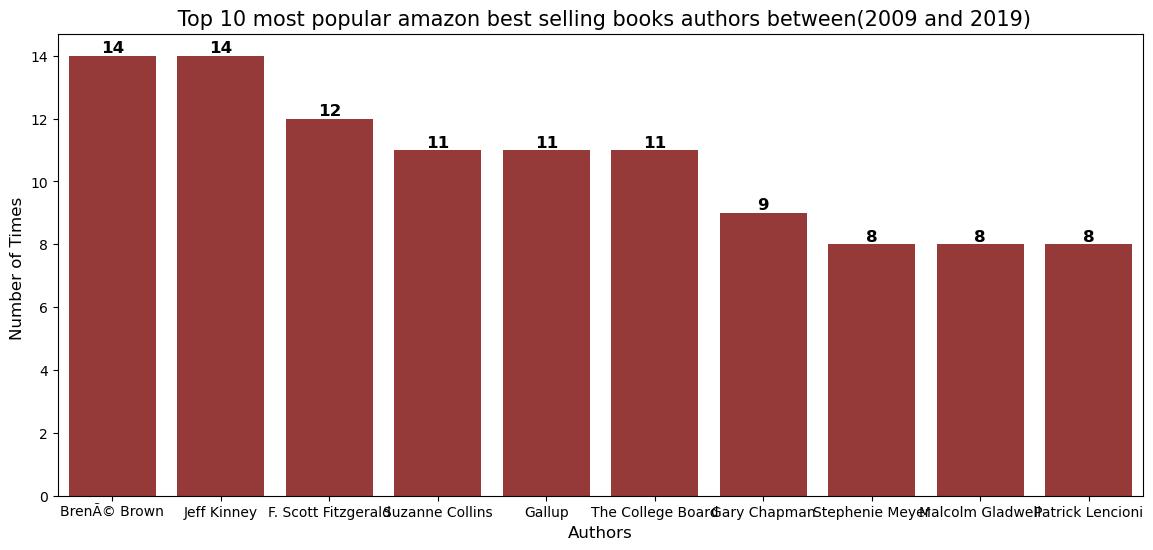

In [23]:
plt.figure(figsize=[14, 6])
ax = sns.countplot(data=best_selling_books, x='author', order=popular_authors, color='brown')

plt.xlabel('Authors',fontsize=12)
plt.ylabel('Number of Times ',fontsize=12)
plt.title(' Top 10 most popular amazon best selling books authors between(2009 and 2019)',fontsize=15)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight='bold')

plt.show()

**Observation:**
Among the top 10 most popular Authors, Author BrenA Brown and Jeff Kinney are the top selling authors with 14 appearances in the top selling books between 2009 and 2019.

## QUESTION 2

### Most popular Top 10 Amazon best selling Books

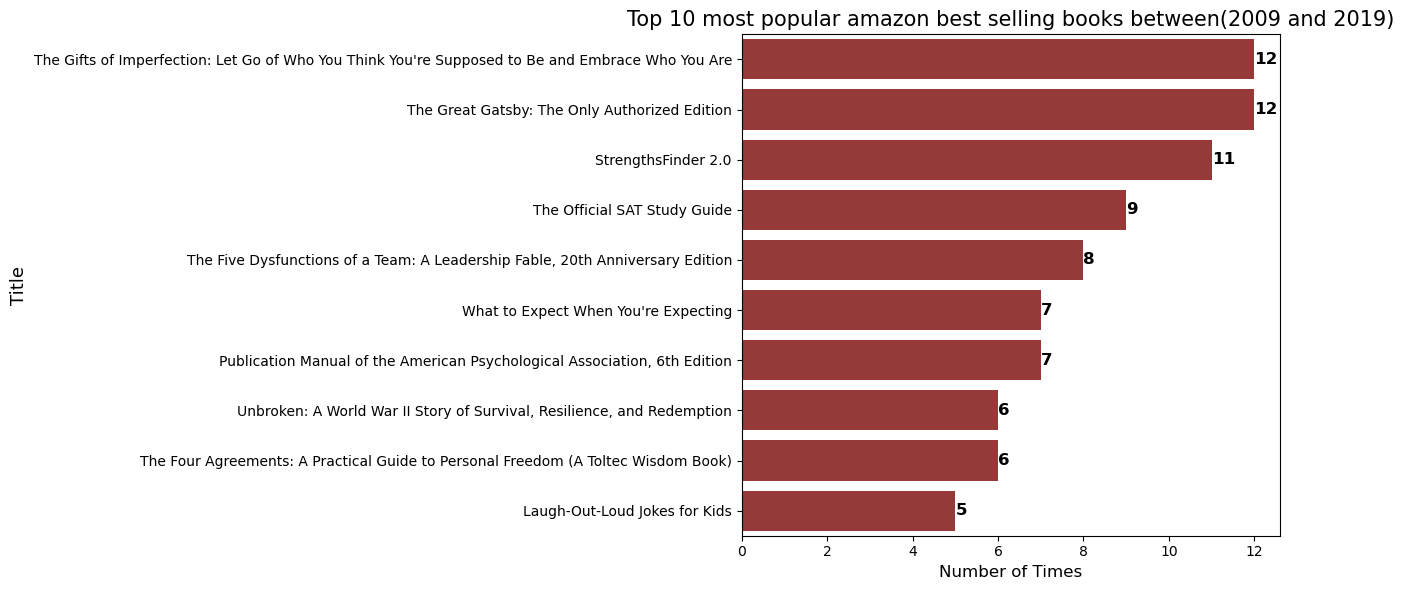

In [24]:
popular_books = best_selling_books['title'].value_counts().head(10).index

plt.figure(figsize=[13, 6])
ax = sns.countplot(data=best_selling_books, y='title', order=popular_books,color='brown') 

plt.xlabel('Number of Times', fontsize=12)  
plt.ylabel('Title', fontsize=13)  
plt.title('Top 10 most popular amazon best selling books between(2009 and 2019)', fontsize=15)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight='bold')

plt.tight_layout() 
plt.show()

**Observation:**
It was observed that the gift of imperfection ,The great Gatsby and Strengths finder 2.0 has the highest number of occurrence amongst the top 10 most popular books.

## QUESTION 3
### Amazon best selling book cover type distribution

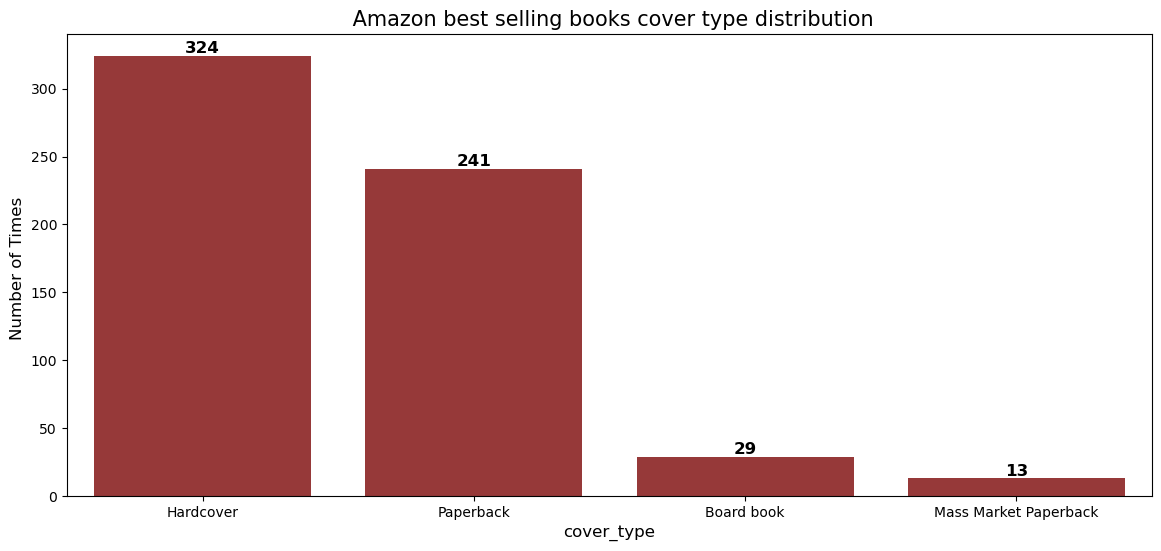

In [25]:
books_covertype = best_selling_books['cover_type'].value_counts().head(10).index

plt.figure(figsize=[14, 6])
ax = sns.countplot(data=best_selling_books, x='cover_type', order=books_covertype, color='brown')

plt.xlabel('cover_type',fontsize=12)
plt.ylabel('Number of Times ',fontsize=12)
plt.title(' Amazon best selling books cover type distribution', fontsize=15)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight='bold')

plt.show()

**Observation:**
According to Amazon's best selling book list between 2009 and 2019, the most popular cover type is hardcover (324 titles); the least popular cover type is Mass Market paperback (13 titles)

## QUESTION 4
### Distribution of Amazon best selling books Rating, Reviews and Price

In [26]:
best_selling_books['ratings'].describe()

count    607.000000
mean       4.588962
std        0.201136
min        3.600000
25%        4.500000
50%        4.600000
75%        4.700000
max        4.900000
Name: ratings, dtype: float64

In [27]:
best_selling_books['price'].describe()

count    607.000000
mean      13.703888
std       10.625932
min        0.000000
25%        8.515000
50%       11.890000
75%       15.710000
max      142.090000
Name: price, dtype: float64

In [28]:
best_selling_books['no_of_reviews'].describe()

count        607
unique       408
top       15,450
freq          12
Name: no_of_reviews, dtype: object

In [29]:
# Checking the datatypes
best_selling_books.dtypes

title             object
genre             object
author            object
cover_type        object
ratings          float64
ranks              int64
price            float64
no_of_reviews     object
year               int64
dtype: object

In [30]:
# Remove commas from the 'no_of_reviews' column
best_selling_books['no_of_reviews'] = best_selling_books['no_of_reviews'].str.replace(',', '')

# Converting the 'no_of_reviews' column from object to numeric 
best_selling_books['no_of_reviews'] = pd.to_numeric(best_selling_books['no_of_reviews'])

In [31]:
print(best_selling_books.dtypes)

title             object
genre             object
author            object
cover_type        object
ratings          float64
ranks              int64
price            float64
no_of_reviews      int64
year               int64
dtype: object


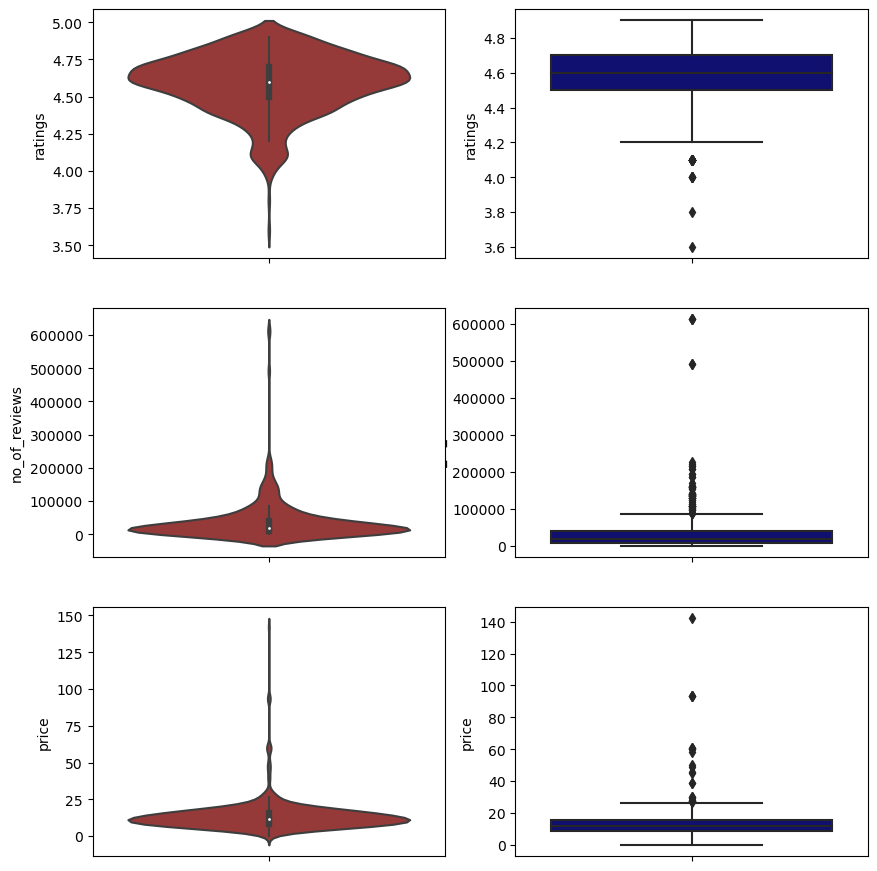

In [32]:
# Boxplots and Violin plots for Rating, Price and Reviews
# Set the color palette
violin_color = 'brown'
boxplot_color = 'navy'

# Boxplots and Violin plots for Rating, Price, and Reviews
plt.figure(figsize=(10, 11))

plt.subplot(3, 2, 2)
sns.boxplot(data=best_selling_books, y='ratings', color=boxplot_color)
plt.subplot(3, 2, 1)
sns.violinplot(data=best_selling_books, y='ratings', color=violin_color)

plt.subplot(3, 2, 6)
sns.boxplot(data=best_selling_books, y='price', color=boxplot_color)
plt.subplot(3, 2, 5)
sns.violinplot(data=best_selling_books, y='price', color=violin_color)

plt.subplot(3, 2, 4)
sns.boxplot(data=best_selling_books, y='no_of_reviews', color=boxplot_color)
plt.subplot(3, 2, 3)
sns.violinplot(data=best_selling_books, y='no_of_reviews', color=violin_color)

plt.show()

**Obsservation**:
The box plot and violin plots show that top outliers in the ratings variable were books that had ratings below 4.0 ratings. It was observed that the outliers in the number of reviews variable is a book that had about 600,000 reviews.  The outlier in the price range is a book that was sold for about 140 dollars.  It was observed that most user ratings occurred between 4.5 and 4.8, most occurring price range was between 10 and 18 dollars, and most occurring number of reviews were below 40,000.

## QUESTION 5
### Amazon best selling unique books distribution of Genre

In [33]:
pd.DataFrame(best_selling_books['genre'].value_counts())

,genre
Non Fiction,348
Fiction,259


In [34]:
##Removing duplicate book titles
no_dup = best_selling_books.drop_duplicates('title')
g_counts = no_dup['genre'].value_counts()
g_counts

Non Fiction    215
Fiction        175
Name: genre, dtype: int64

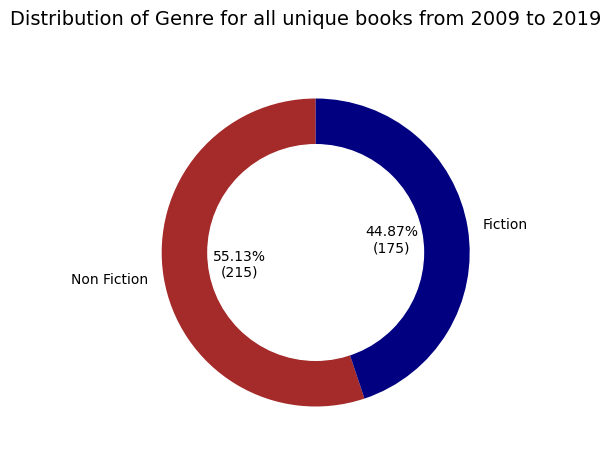

In [35]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['brown','navy']

fig, ax = plt.subplots(figsize=(8,5))

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_counts.values, labels=g_counts.index, autopct=make_autopct(g_counts.values), 
          startangle=90, textprops={'size': 10}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)


fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=14)
fig.show()

**Observation**
The Amazon best book selling with Non-Fiction category was the most popular category from 2009 to 2019, with 55.13% (percent) of the 215 books being Non-Fiction and 45.6% (percent) being Fiction.

## QUESTION 6
### Amazon best selling unique books distribution of Genre for each year

In [36]:
# Comparing fiction and non fiction totals
nonfiction = len(best_selling_books[best_selling_books.genre =='Non Fiction'])
fiction = len(best_selling_books[best_selling_books.genre =='Fiction'])
data = [nonfiction,fiction]

In [37]:
pd.DataFrame(best_selling_books.groupby(best_selling_books.year).genre.value_counts())

genre
year genre             
2009 Non Fiction     29
     Fiction         28
2010 Non Fiction     35
     Fiction         21
2011 Non Fiction     28
     Fiction         26
2012 Non Fiction     33
     Fiction         25
2013 Non Fiction     31
     Fiction         24
2014 Fiction         31
     Non Fiction     25
2015 Non Fiction     34
     Fiction         19
2016 Non Fiction     32
     Fiction         26
2017 Non Fiction     36
     Fiction         18
2018 Non Fiction     33
     Fiction         20
2019 Non Fiction     32
     Fiction         21

In [38]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_counts =best_selling_books['genre'].value_counts()
g_counts

Non Fiction    348
Fiction        259
Name: genre, dtype: int64

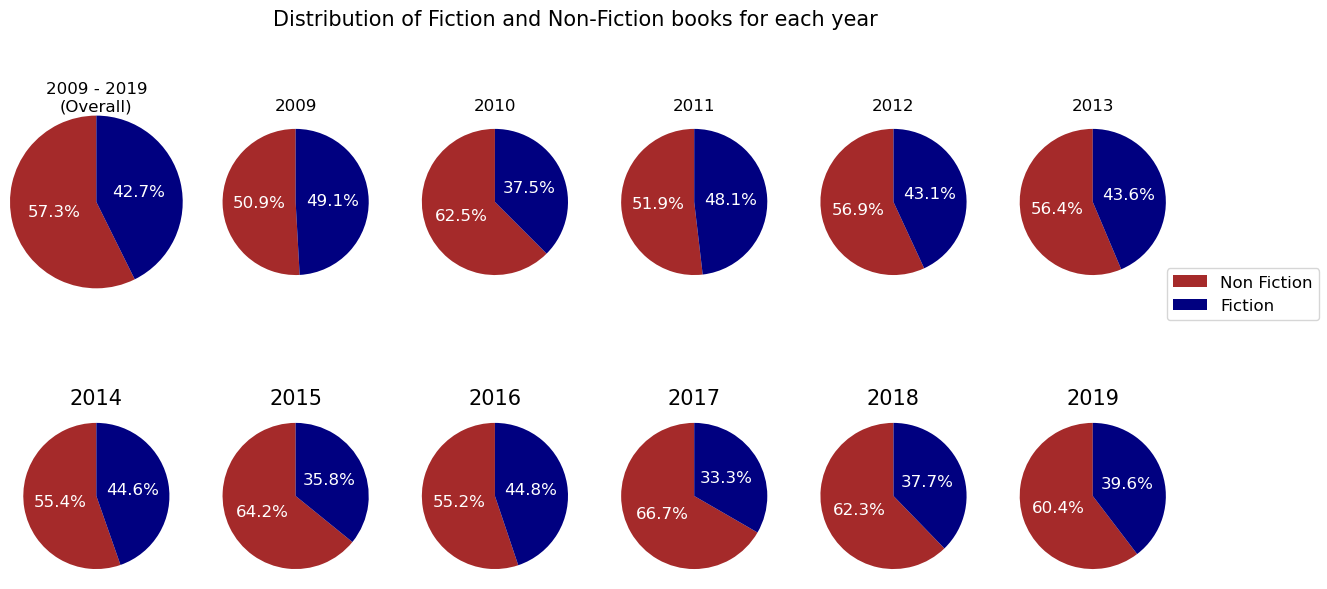

In [39]:
fig, ax = plt.subplots(2, 6, figsize=(15,7))

ax[0,0].pie(x=g_counts.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='black', fontdict={'fontsize': 12})

for i, year in enumerate(y1):
    counts = best_selling_books[best_selling_books['year'] == year]['genre'].value_counts()
    ax[0,i+1].set_title(year, color='black', fontdict={'fontsize': 12})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = best_selling_books[best_selling_books['year'] == year]['genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='black', fontdict={'fontsize': 15})

plt.suptitle('Distribution of Fiction and Non-Fiction books for each year',fontsize=15)
            
fig.legend(g_counts.index, loc='center right', fontsize=12)
fig.show()

**Observation**:
It was observed that  the highest percentage (66.7%) of Non fiction books were sold in 2017 and the highest percentage of fiction books were sold in 2009.

However,the lowest percentage of books for Non fiction were sold in 2009 and lowest percentage of fiction books sold are in 2007.

## BIVARIATE ANALYSIS

#### 7.Top 10 best selling  Authors with highest Reviews 
#### 8.Amazon best selling books Genre category based on Reviews
#### 9. Relationship between the Amazon best selling book prices and Years
#### 10. Relationship between Amazon best selling book Prices and number of reviews
#### 11.Top 10 best selling books Authors with the highest User Ratings
#### 12. Top 10 best selling Authors with Book prices 


## QUESTION 7
### 7.Top 10 best selling  Authors with highest Reviews 

In [40]:
# Top 10 Authors by mean reviews
author_and_reviews = pd.DataFrame(best_selling_books.groupby('author')['no_of_reviews'].mean().sort_values(ascending=False).iloc[:10].reset_index())
author_and_reviews

,author,no_of_reviews
0,Delia Owens,611916.0
1,Paula Hawkins,492045.0
2,Gail Honeyman,226373.0
3,Mark Sullivan,221837.0
4,Anthony Doerr,215099.0
5,Tara Westover,208290.0
6,Michelle Obama,195535.0
7,Fredrik Backman,185952.0
8,Andy Weir,170654.0
9,Gillian Flynn,161507.0


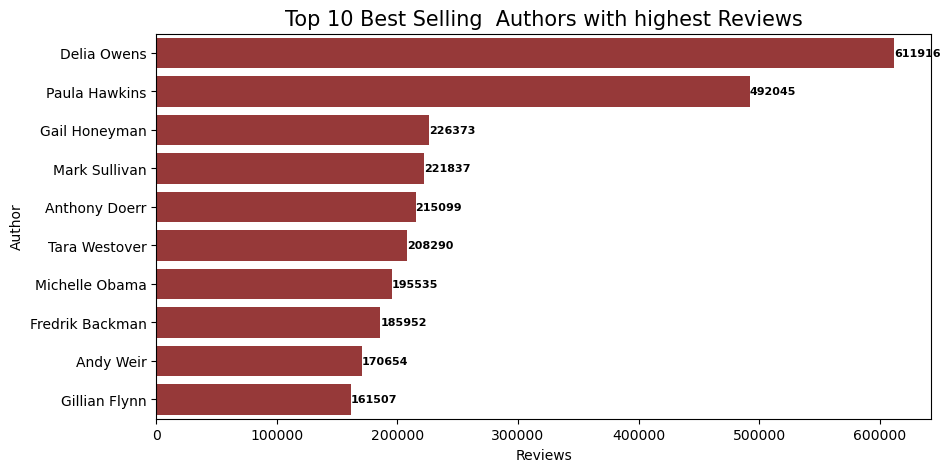

In [41]:
## Visualizing Top 10 best selling  Authors with highest Reviews
plt.figure(figsize=(10,5))
ax=sns.barplot(data=author_and_reviews, x='no_of_reviews', y='author', color='brown')
plt.ylabel('Author', fontsize=10)
plt.xlabel('Reviews', fontsize=10)
plt.title('Top 10 Best Selling  Authors with highest Reviews', fontsize =15)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, fontweight='bold')
plt.show()

**Observation**:
Paula Hawkins and Delia Owens are the two best selling authors with the highest number of books reviews in the top 10. However, we can see that Delia Owens is that one outlier that appears to have had the highest number of reviews, approximately 611,916 which is much higher than the number of reviews of other authors.

## QUESTION 8
### Amazon best selling books Genre category based on Reviews

In [42]:
# Total no of reviews for each genre
genre_and_reviews = pd.DataFrame(best_selling_books.groupby('genre')['no_of_reviews'].mean().sort_values(ascending=False).iloc[:10].reset_index())
genre_and_reviews

,genre,no_of_reviews
0,Fiction,56963.254826
1,Non Fiction,24951.899425


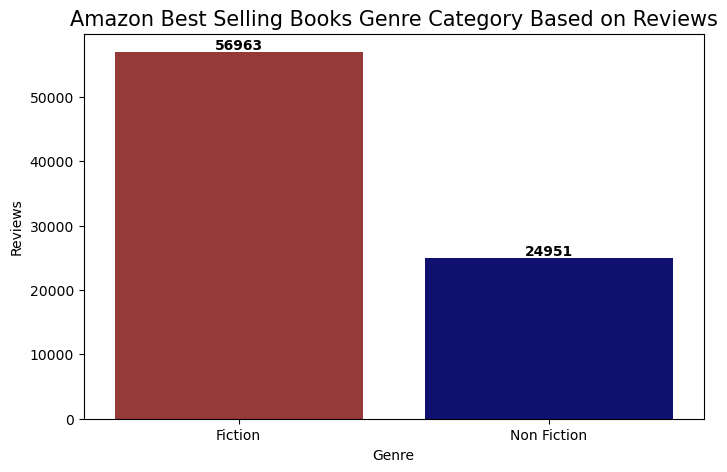

In [43]:
## Visualizing Top 10 best selling book genre category based on  Reviews
plt.figure(figsize=(8, 5))
colors = ['brown', 'navy']
ax=sns.barplot(data=genre_and_reviews, x='genre', y='no_of_reviews', palette=colors)
plt.ylabel('Reviews', fontsize=10)
plt.xlabel('Genre', fontsize=10)
plt.title('Amazon Best Selling Books Genre Category Based on Reviews', fontsize =15)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, fontweight='bold')
plt.show()




**Observation**:
It was observed that the top 10 best-selling fiction titles received approximately 56,963 reviews on average, while the top 10 best-selling non-fiction titles received approximately 24,952 reviews on average.
We can see that Fiction best-selling books received more reviews than non fiction between 2009 and 2019.

## QUESTION 9
### Relationship between the Amazon best selling book prices and Years

In [44]:
# Average price of books for each year
avg_price_and_yr = best_selling_books.groupby('year').price.mean().sort_values(ascending=False)
avg_price_and_yr

year
2013    17.081091
2009    16.277368
2011    16.154444
2012    15.659310
2014    14.597143
2010    13.633393
2015    11.855094
2018    11.510755
2017    11.380926
2016    11.175690
2019    11.100943
Name: price, dtype: float64

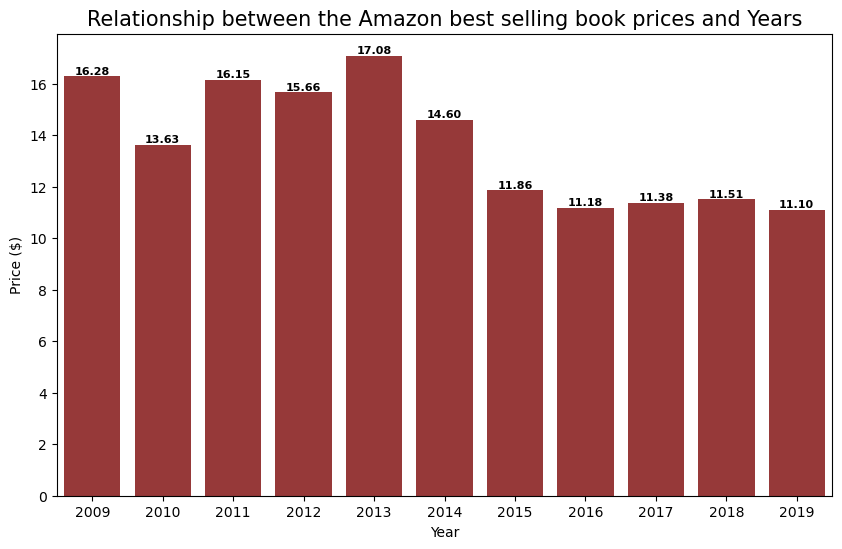

In [45]:
## Visualizing Relationship between the Amazon best selling book prices and Years
plt.figure(figsize=(10,6))
ax = sns.barplot(x=avg_price_and_yr.index, y=avg_price_and_yr, color='brown')

plt.ylabel('Price ($)', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.title('Relationship between the Amazon best selling book prices and Years', fontsize=15)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8, fontweight='bold')
plt.show()

**Observation**
The average price of Amazon's best-selling books has decreased over the years; in 2013 it was around 17.08 dollars, but by 2019, it was approximately 11.10dollars.Overall, cost of books were decreasing with Years.

## QUESTION 10
### Relationship between Amazon best selling book  Prices and number of reviews

In [46]:
best_selling_books.corr()

,ratings,ranks,price,no_of_reviews,year
ratings,1.000000,-0.012382,-0.052657,-0.010971,0.185152
ranks,-0.012382,1.000000,-0.028871,-0.125734,0.036606
price,-0.052657,-0.028871,1.000000,-0.073720,-0.169737
no_of_reviews,-0.010971,-0.125734,-0.073720,1.000000,0.304482
year,0.185152,0.036606,-0.169737,0.304482,1.000000


Correlation coefficient: -0.07371969563447367


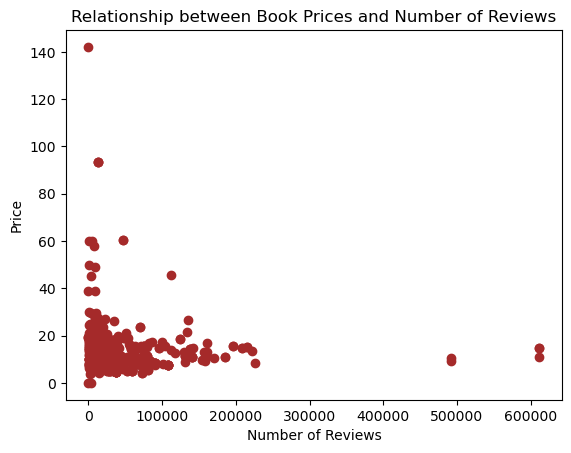

In [47]:
## Visualizing Relationship between Prices of books vs Number of Reviews
plt.scatter(best_selling_books['no_of_reviews'], best_selling_books['price'], color='brown')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Relationship between Book Prices and Number of Reviews')

# Calculate correlation coefficient
corr = np.corrcoef(x=best_selling_books['no_of_reviews'], y=best_selling_books['price'])[0, 1]
print("Correlation coefficient:", corr)

plt.show()


**Observation**:
From the scatterplot, there is a negative correlation between prices and the number of reviews. This indicates that as the number of reviews increases, the price decreases slightly, but the correlation is not very strong, suggesting that the relationship is not significant. In other words, a correlation does not imply causation, so we cannot conclude that a decrease in prices directly results from an increase in reviews. We also observed that there are outliers in the prices of books which are above 140 dollars and number of reviews which is above 600,000 reviews.

## QUESTION 11
### Top 10 best selling books Authors with the highest User Ratings

In [48]:
#Top 10 authors by mean user rating
author_and_ratings = pd.DataFrame(best_selling_books.groupby('author')['ratings'].mean().sort_values(ascending=False).iloc[:10].reset_index())
author_and_ratings

,author,ratings
0,Priscilla Shirer,4.9
1,J. Kenji LÃ³pez-Alt,4.9
2,Rush Limbaugh,4.9
3,Bill Martin Jr.,4.9
4,Shel Silverstein,4.9
5,Patrick Thorpe,4.9
6,Sally Lloyd-Jones,4.9
7,Robert Munsch,4.9
8,Eric Carle,4.9
9,Lin-Manuel Miranda,4.9


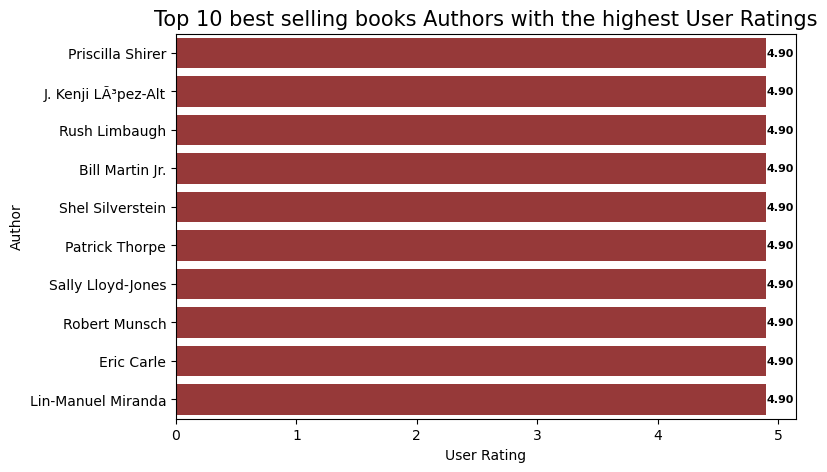

In [49]:
# Visualizing the top 10 authors based on user ratings
plt.figure(figsize=(8,5))
ax=sns.barplot(data=author_and_ratings, x='ratings', y='author', color='brown')
plt.ylabel('Author', fontsize=10)
plt.xlabel('User Rating', fontsize=10)
plt.title('Top 10 best selling books Authors with the highest User Ratings', fontsize =15)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8, fontweight='bold')
plt.show()

**Observation**
The top 10 amazon best selling books Authors with the highest User ratings has 4.90 stars for their books.

## QUESTION 12
### Top 10 Amazon best selling book Authors with Book prices 

In [50]:
# Top 10 Authors by mean price
authors_and_prices = pd.DataFrame(best_selling_books.groupby('author')['price'].mean().sort_values(ascending=False).iloc[:10].reset_index())
authors_and_prices

,author,price
0,American Psychiatric Association,93.490000
1,Haruki Murakami,48.890000
2,J. K. Rowling,45.440000
3,Kelly Starrett,45.140000
4,Robert Kirkman,38.990000
5,The College Board,33.035455
6,ACT,29.920000
7,Thug Kitchen,29.740000
8,J. Kenji LÃ³pez-Alt,27.990000
9,Julia Child,27.620000


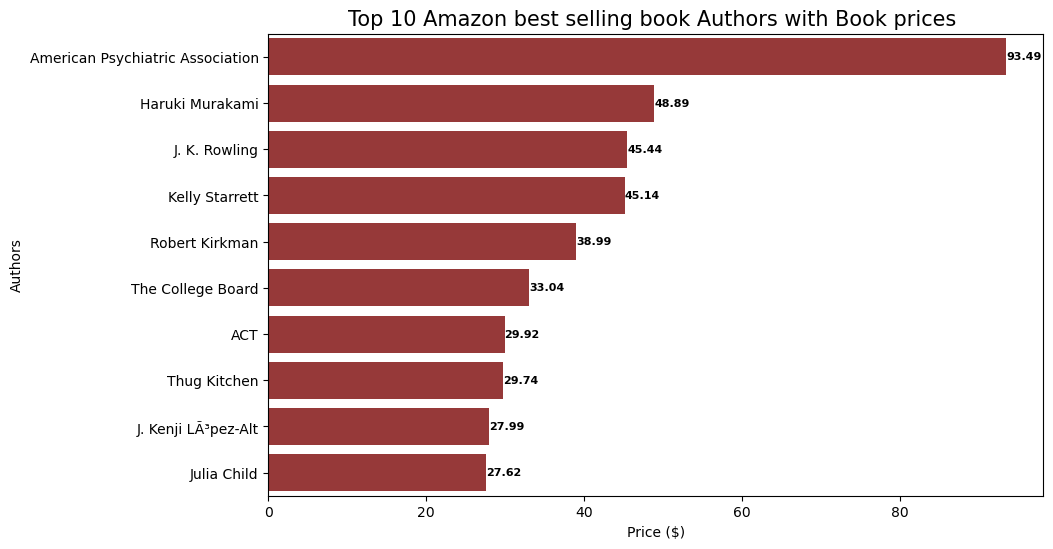

In [51]:
plt.figure(figsize=(10,6))
ax =sns.barplot(data=authors_and_prices, x='price', y='author', color='brown')

plt.xlabel('Price ($)', fontsize=10)
plt.ylabel('Authors', fontsize=10)
plt.title('Top 10 Amazon best selling book Authors with Book prices ', fontsize=15)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8, fontweight='bold')
plt.show()

**Observation**
It can be observed that the author with highest priced books is American Psychiatric Association who charges 93.49 dollars. However, American Psychiatric Association is an outlier having the maximum price of above 80dollars.

## MULTIVARIATE ANALYSIS
#### 13. Is there any correlation between the amazon best selling books variables?
#### 14. Top 10 Best Selling Authors based on Genre and Number of Appearances
#### 15.  Amazon Top 5 Selling Books Based on Number of Reviews
#### 16. A word Cloud of the Top Best Selling Books Between 2009 and 2019

## QUESTION 13
### Correlation between the amazon best selling books variables?

In [52]:
best_selling_books

,title,genre,author,cover_type,ratings,ranks,price,no_of_reviews,year
0,The Shack: Where Tragedy Confronts Eternity,Fiction,William P. Young,Paperback,4.6,2,6.99,41124,2009
1,The Shack: Where Tragedy Confronts Eternity,Fiction,William P. Young,Paperback,4.6,27,6.99,41124,2017
6,Liberty and Tyranny: A Conservative Manifesto,Non Fiction,Mark R. Levin,Hardcover,4.8,3,20.31,5340,2009
7,"Breaking Dawn (The Twilight Saga, Book 4)",Fiction,Stephenie Meyer,Hardcover,4.7,4,20.49,25408,2009
9,Going Rogue: An American Life,Non Fiction,Sarah Palin,Hardcover,4.6,5,6.30,1599,2009
...,...,...,...,...,...,...,...,...,...
1832,Me: Elton John Official Autobiography,Non Fiction,Elton John,Hardcover,4.7,75,9.90,27342,2019
1833,The Road Back to You: An Enneagram Journey to ...,Non Fiction,Ian Morgan Cron,Hardcover,4.7,76,9.99,12563,2019
1834,The Tattooist of Auschwitz: A Novel,Fiction,Heather Morris,Paperback,4.6,77,9.39,158421,2019
1835,People of Walmart Adult Coloring Book: Rolling...,Non Fiction,Andrew Kipple,Paperback,4.7,78,12.96,11494,2019


In [53]:
best_selling_books.corr()

,ratings,ranks,price,no_of_reviews,year
ratings,1.000000,-0.012382,-0.052657,-0.010971,0.185152
ranks,-0.012382,1.000000,-0.028871,-0.125734,0.036606
price,-0.052657,-0.028871,1.000000,-0.073720,-0.169737
no_of_reviews,-0.010971,-0.125734,-0.073720,1.000000,0.304482
year,0.185152,0.036606,-0.169737,0.304482,1.000000


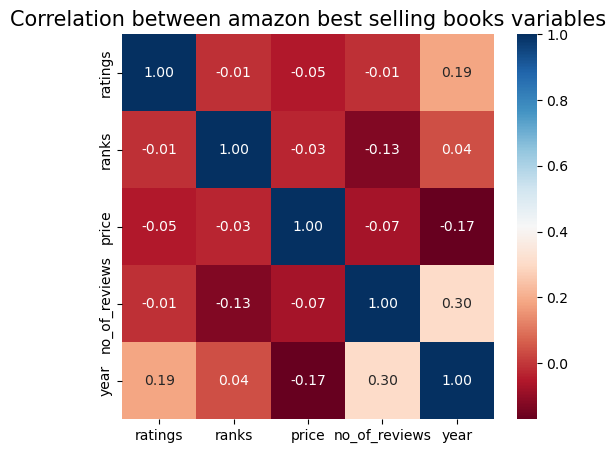

In [54]:
### Visualizing correlation between amazon best selling books variables using heat map
data =best_selling_books.corr()
plt.figure(figsize=(6,5))
df = pd.DataFrame(data, index=['ratings', 'ranks', 'price', 'no_of_reviews', 'year'])
sns.heatmap(df, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation between amazon best selling books variables', fontsize=15)
plt.show()

**Observation:**
From the amazon best books selling, the heatmap shows that year has a positive correlation with the book’s ratings. A strong correlation exists between the number of reviews and the year, suggesting that the number of reviews tends to increase over time, however, the other correlations are not significant enough to draw strong conclusions about their relationships

## QUESTION 14
### Top 10 Best Selling Authors based on Genre and Number of books Appearances

In [55]:
nonf_authors = best_selling_books.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Non Fiction'].sort_values(ascending=False)[:10].reset_index()
nonf_authors

,author,title
,,Non Fiction
0,The College Board,11.0
1,Gallup,11.0
2,Gary Chapman,9.0
3,Malcolm Gladwell,8.0
4,BrenÃ© Brown,8.0
5,American Psychological Association,7.0
6,Heidi Murkoff,7.0
7,F. Scott Fitzgerald,6.0
8,Bill O'Reilly,6.0


In [56]:
fic_authors = best_selling_books.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Fiction'].sort_values(ascending=False)[:10].reset_index()
fic_authors

,author,title
,,Fiction
0,Jeff Kinney,14.0
1,Suzanne Collins,11.0
2,Stephenie Meyer,8.0
3,John Grisham,6.0
4,BrenÃ© Brown,6.0
5,Stephen King,6.0
6,John Green,6.0
7,Veronica Roth,6.0
8,F. Scott Fitzgerald,6.0


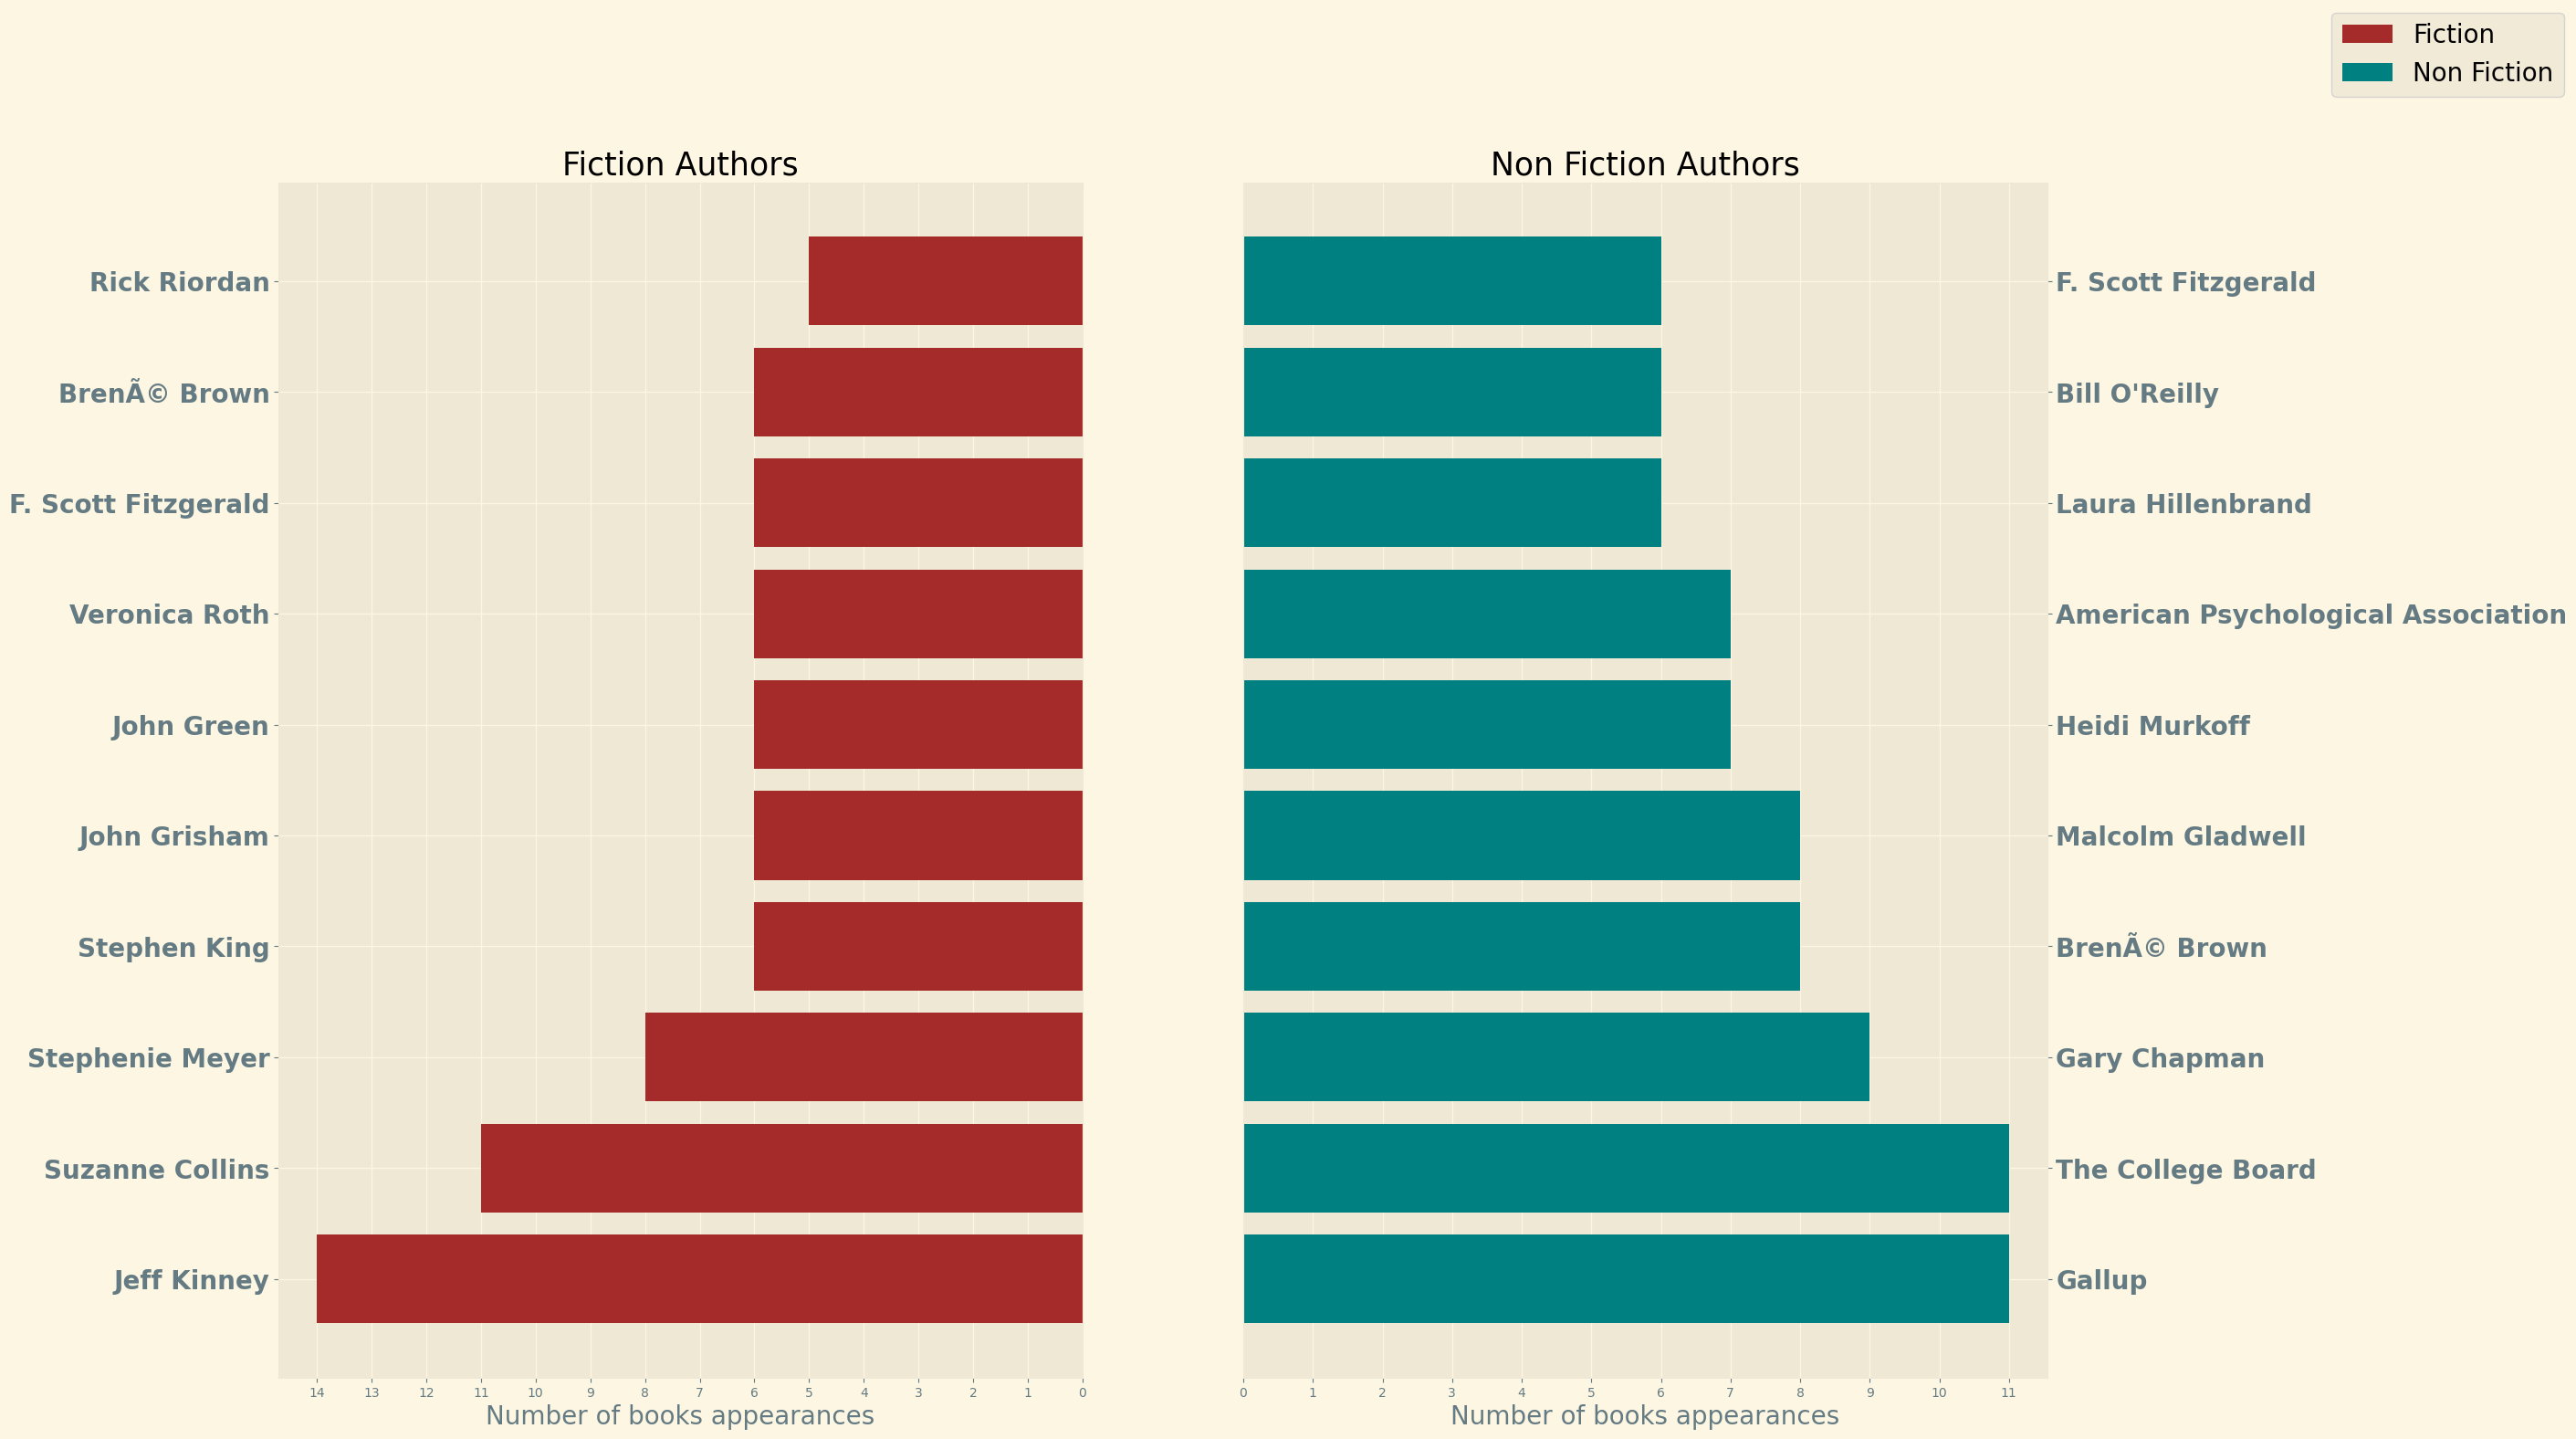

In [57]:
author_genre_counts = best_selling_books.groupby(['author', 'genre'])['title'].count().unstack(fill_value=0)

# Sorting the authors based on the number of appearances in the 'Fiction' and non fiction  genre
fic_authors = author_genre_counts['Fiction'].sort_values(ascending=False)[:10].reset_index()
nonf_authors = author_genre_counts['Non Fiction'].sort_values(ascending=False)[:10].reset_index()

genre_col = ['brown', 'teal']
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(25, 17))
    
    
    ax[0].barh(y=fic_authors['author'], width=fic_authors['Fiction'],
               color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(fic_authors['Fiction']) + 1))
    ax[0].set_yticklabels(fic_authors['author'].tolist(), fontsize=20, fontweight='semibold')
    ax[0].set_title('Fiction Authors', fontsize=25)
    ax[0].set_xlabel('Number of books appearances', fontsize=20)
    
    
    ax[1].barh(y=nonf_authors['author'], width=nonf_authors['Non Fiction'],
               color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(nonf_authors['Non Fiction']) + 1))
    ax[1].set_yticklabels(nonf_authors['author'].tolist(), fontsize=20, fontweight='bold')
    ax[1].set_title('Non Fiction Authors', fontsize=25)
    ax[1].set_xlabel('Number of books appearances', fontsize=20)
    
    fig.legend(['Fiction', 'Non Fiction'], fontsize=20)
    
plt.show()


**Observation**:Among the top 10 Best Selling Authors based on Genre and Number of their books appearances.
Jeff Kinney and Suzanne collins rank the top two best selling authors for Fiction genre category between 2009 and 2019.
The top two best selling authors in Non Fiction  genre category between 2009 and 2019 are Gallup and the College Board Authors.

## QUESTION 15
### Amazon Top 5 Selling Books Based on Number of Reviews

In [58]:
# Based on reviews, group by name, author, and genre
book_genre_reviews = pd.DataFrame(best_selling_books.groupby(['title', 'author', 'genre']).no_of_reviews.mean()).reset_index()
book_genre_reviews= book_genre_reviews.sort_values(by='no_of_reviews', ascending=False)
book_genre_reviews.head(10)

,title,author,genre,no_of_reviews
386,Where the Crawdads Sing,Delia Owens,Fiction,611916.0
285,The Girl on the Train,Paula Hawkins,Fiction,492045.0
94,Eleanor Oliphant Is Completely Fine: A Novel,Gail Honeyman,Fiction,226373.0
34,Beneath a Scarlet Sky: A Novel,Mark Sullivan,Fiction,221837.0
17,All the Light We Cannot See,Anthony Doerr,Fiction,215099.0
92,Educated: A Memoir,Tara Westover,Non Fiction,208290.0
30,Becoming,Michelle Obama,Non Fiction,195535.0
9,A Man Called Ove: A Novel,Fredrik Backman,Fiction,185952.0
317,The Martian,Andy Weir,Fiction,170654.0
135,Gone Girl,Gillian Flynn,Fiction,161507.0


In [59]:
# Extract data for fiction and non fiction genres
genre_reviews_fiction =book_genre_reviews.loc[book_genre_reviews.genre=='Fiction']
genre_reviews_non_fiction =book_genre_reviews.loc[book_genre_reviews.genre=='Non Fiction']

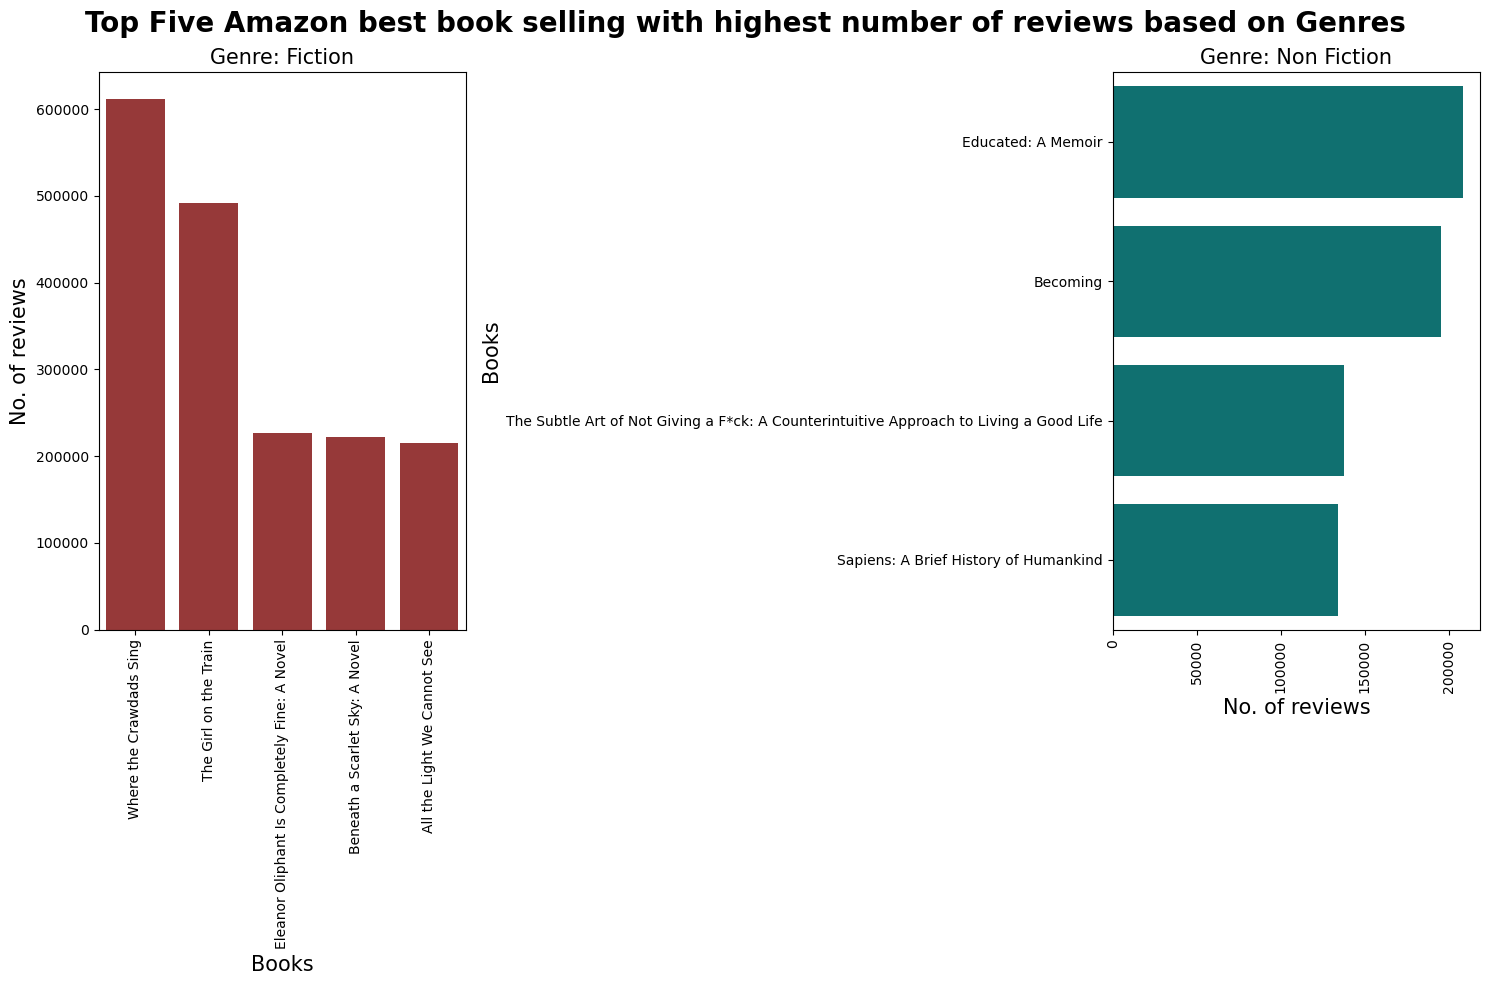

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Top Five Amazon best book selling with highest number of reviews based on Genres', weight='bold',fontsize=20)

plt.subplot(1,2,1)
fiction = sns.barplot(data=genre_reviews_fiction.head(), y='no_of_reviews', x='title', color='brown')
plt.xticks(rotation=90)
plt.title("Genre: Fiction", fontsize=15)
plt.ylabel('No. of reviews', fontsize=15)
plt.xlabel("Books", fontsize=15)

plt.subplot(1,2,2)
fiction = sns.barplot(data=genre_reviews_non_fiction.head(), x='no_of_reviews', y='title', color='teal')
plt.xticks(rotation=90)
plt.title("Genre: Non Fiction", fontsize=15)
plt.xlabel("No. of reviews", fontsize = 15)
plt.ylabel("Books", fontsize=15)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show();

**Observations**
Amazon top 5 best Fiction selling books based on user reviews are Where the Crawdads Sing, The Girl on the train, Eleanor Oliphant is completely fine: A novel, beneath a Scarlet Sky and All the light we cannot see. However, Where the Crawdads Sing is that outlier with the highest number of reviews of about 611,916 reviews.
Amazon top 5 best Non-Fiction selling books based on user reviews are Educated: A Memoir, Becoming, The Subtle Art of Not Giving a Fuck: A Counterintuitive Approach to Living a Good Life, Sapiens: Brief History of Humankind. However, Where the Educated: A Memoirs is that outlier with the highest number of reviews of about 208,290 reviews.


### QUESTION 16
### A word Cloud of the Top Best Selling Books Between 2009 and 2019

In [61]:
# creating a new dataframe with name, year, and genre only
df = best_selling_books[['title', 'year', 'genre']]

# create a new column stating each book individually counts 1 instance
df['Times'] = 1

# group the books based on the number of times they appeared in dataset
Top_books = pd.DataFrame(df.groupby('title').Times.sum().reset_index())

# now sort the data based on number of times they appeared in dataset
Top_books = Top_books.sort_values(by='Times', ascending=False)

# fetch 10 books
Top_books.head(10)

,title,Times
285,The Great Gatsby: The Only Authorized Edition,12
277,The Gifts of Imperfection: Let Go of Who You T...,12
239,StrengthsFinder 2.0,11
311,The Official SAT Study Guide,9
272,The Five Dysfunctions of a Team: A Leadership ...,8
214,Publication Manual of the American Psychologic...,7
375,What to Expect When You're Expecting,7
274,The Four Agreements: A Practical Guide to Pers...,6
368,"Unbroken: A World War II Story of Survival, Re...",6
249,The 5 Love Languages: The Secret to Love that ...,5


In [62]:
Top_books.shape

(390, 2)

In [63]:
# Function for text preprocessing
def clean_token(data):
    words = " ".join(data)
    tokens = word_tokenize(words)
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    tokens = [t for t in tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens


In [64]:
# Getting the book titles from the Top_10_books DataFrame
book_titles = Top_books['title'].tolist()

# Cleaning and lemmatize the book titles using the clean_token function
cleaned_tokens = clean_token(book_titles)

# Joining the cleaned tokens back into a single string
cleaned_text = " ".join(cleaned_tokens)


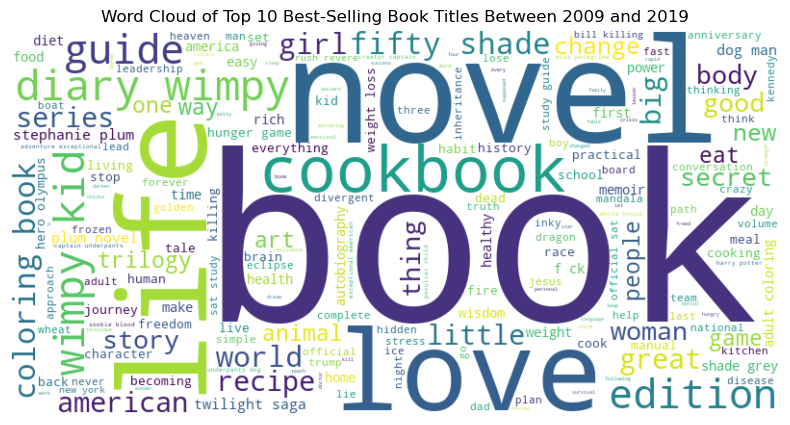

In [65]:
# Generating and diplaying the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 10 Best-Selling Book Titles Between 2009 and 2019')
plt.show()

**Observation**The Word cloud for amazon best selling books provides at-a-glance view and It makes it easier to communicate the main themes or trends in huge text sets to a wider audience when they can be summarized and visualized in such an appealing and straightforward way.

## CONCLUSION

### Among the top 10 most popular Authors, Author BrenA Brown and Jeff Kinney are the top selling authors with 14 appearances in the top selling books between 2009 and 2019.

### It was observed that the gift of imperfection, The great Gatsby, and Strength’s finder 2.0 has the highest number of occurrences amongst the top 10 most popular books.

### According to Amazon's best selling book list between 2009 and 2019, the most popular cover type is hardcover (324 titles); the least popular cover type is Mass Market paperback (13 titles).

### The box plot and violin plots show that top outliers in the ratings variable were books that had ratings below 4.0 ratings. It was observed that the outliers in the number of reviews variable is a book that had about 600,000 reviews.  The outlier in the price range is a book that was sold for about 140 dollars.  It was observed that most user ratings occurred between 4.5 and 4.8, most occurring price range was between 10 and 18 dollars, and most occurring number of reviews were below 40,000.

### The Amazon best book selling with Non-Fiction category was the most popular category from 2009 to 2019, with 55.13% (percent) of the 215 books being Non-Fiction and 45.6% (percent) being Fiction.

### It was observed that the highest percentage (66.7%) of Nonfiction books were sold in 2017 and the highest percentage of fiction books were sold in 2009. However, the lowest percentage of books for Nonfiction were sold in 2009 and lowest percentage of fiction books sold are in 2007.

### Paula Hawkins and Delia Owens are the two best selling authors with the highest number of books reviews in the top 10. However, we can see that Delia Owens is that one outlier that appears to have had the highest number of reviews, approximately 611,916 which is much higher than the number of reviews of other authors.

### It was observed that the top 10 best-selling fiction titles received approximately 56,963 reviews on average, while the top 10 best-selling non-fiction titles received approximately 24,952 reviews on average. We can see that Fiction best-selling books received more reviews than non-fiction between 2009 and 2019.

### The average price of Amazon's best-selling books has decreased over the years; in 2013 it was around 17.08 dollars, but by 2019, it was approximately 11. 10dollars.Overall, cost of books was decreasing with Years.

### From the scatterplot, there is a negative correlation between prices and the number of reviews. This indicates that as the number of reviews increases, the price decreases slightly, but the correlation is not very strong, suggesting that the relationship is not significant. In other words, a correlation does not imply causation, so we cannot conclude that a decrease in prices directly results from an increase in reviews. We also observed that there are outliers in the prices of books which are above 140 dollars and number of reviews which is above 600,000 reviews.

### The top 10 amazon best selling books Authors with the highest User ratings have 4.90 stars for their books.

### It can be observed that the author with highest priced books is American Psychiatric Association who charges 93.49 dollars. However, American Psychiatric Association is an outlier having the maximum price of above 80dollars.

### From the amazon best books selling, the heatmap shows that year has a positive correlation with the book’s ratings. A strong correlation exists between the number of reviews and the year, suggesting that the number of reviews tends to increase over time, however, the other correlations are not significant enough to draw strong conclusions about their relationships.

### Among the top 10 Best Selling Authors based on Genre and Number of their book’s appearances-Jeff Kinney and Suzanne collins rank the top two best selling authors for Fiction genre category between 2009 and 2019.The top two best selling authors in Non-Fiction genre category between 2009 and 2019 are Gallup and the College Board Authors.

### Amazon top 5 best Fiction selling books based on user reviews are Where the Crawdads Sing, The Girl on the train, Eleanor Oliphant is completely fine: A novel, beneath a Scarlet Sky and All the light we cannot see. However, Where the Crawdads Sing is that outlier with the highest number of reviews of about 611,916 reviews.


### Amazon top 5 best Non-Fiction selling books based on user reviews are Educated: A Memoir, becoming, The Subtle Art of Not Giving a Fuck: A Counterintuitive Approach to Living a Good Life, Sapiens: A Brief History of Humankind. However, Where the Educated: A Memoirs is that outlier with the highest number of reviews of about 208,290 reviews.

### The Word cloud for amazon best selling books provides at-a-glance view and it makes it easier to communicate the main themes or trends in huge text sets to a wider audience when they can be summarized and visualized in such an appealing and straightforward way.
